In [40]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#add data files
data_population = pd.read_csv("E:\\INTERN\\pordigy\\task1\\API_SP.POP.TOTL_DS2_en_csv_v2_900.csv", skiprows=4)
data_country_meta = pd.read_csv("E:\\INTERN\\pordigy\\task1\\Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_900.csv")
data_indicator=pd.read_csv("E:\\INTERN\\pordigy\\task1\\Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_900.csv")


In [9]:
# Display the first few rows of the datasets
print(data_population.head())
print(data_country_meta.head())
print(data_indicator.head())


                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130072080.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2015         2016         2017         2018  \
0      58190.0  .

In [11]:
#Merge the data_population with data_country_meta on 'Country Code'
merged_data = pd.merge(data_population, data_country_meta, on='Country Code')

#Merge the indicator metadata (data_indicator) with the merged data
merged_data = pd.merge(
    merged_data,
    data_indicator,
    left_on='Indicator Code',
    right_on='INDICATOR_CODE',
    how='left'
)

# Convert the '2020' column to numeric to handle non-numeric values or errors
merged_data['2020'] = pd.to_numeric(merged_data['2020'], errors='coerce')

# Select relevant columns for analysis and drop NaN values
data_2020 = merged_data[['IncomeGroup', '2020', 'INDICATOR_NAME']].dropna()

# Display the first few rows of the processed data
print("Processed Data (First 5 Rows):")
print(data_2020.head())


Processed Data (First 5 Rows):
           IncomeGroup        2020     INDICATOR_NAME
0          High income    108587.0  Population, total
2           Low income  39068979.0  Population, total
4  Lower middle income  33451132.0  Population, total
5  Upper middle income   2837849.0  Population, total
6          High income     77380.0  Population, total


In [13]:
# Group by 'IncomeGroup' and sum the total population
grouped_data = data_2020.groupby('IncomeGroup').sum().sort_values(by='2020', ascending=False)

# Display the grouped data
print("Total Population by Income Group (2020):")
print(grouped_data)


Total Population by Income Group (2020):
                             2020  \
IncomeGroup                         
Lower middle income  2.966397e+09   
Upper middle income  2.792212e+09   
High income          1.365941e+09   
Low income           6.795607e+08   

                                                        INDICATOR_NAME  
IncomeGroup                                                             
Lower middle income  Population, totalPopulation, totalPopulation, ...  
Upper middle income  Population, totalPopulation, totalPopulation, ...  
High income          Population, totalPopulation, totalPopulation, ...  
Low income           Population, totalPopulation, totalPopulation, ...  


Bargraph representation

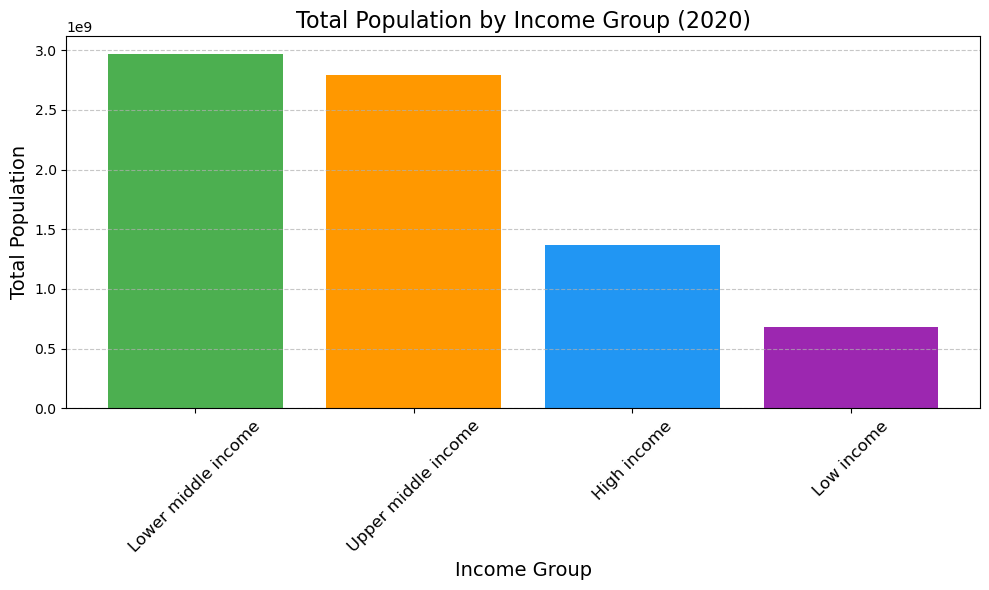

In [16]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['2020'], color=['#4CAF50', '#FF9800', '#2196F3', '#9C27B0', '#F44336'])
plt.title('Total Population by Income Group (2020)', fontsize=16)
plt.xlabel('Income Group', fontsize=14)
plt.ylabel('Total Population', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [25]:
# Save the plot to a file
plt.savefig("E:\\INTERN\\pordigy\\task1\\population_by_income_group_with_indicator_2020.png")


<Figure size 640x480 with 0 Axes>

Histrogram representation


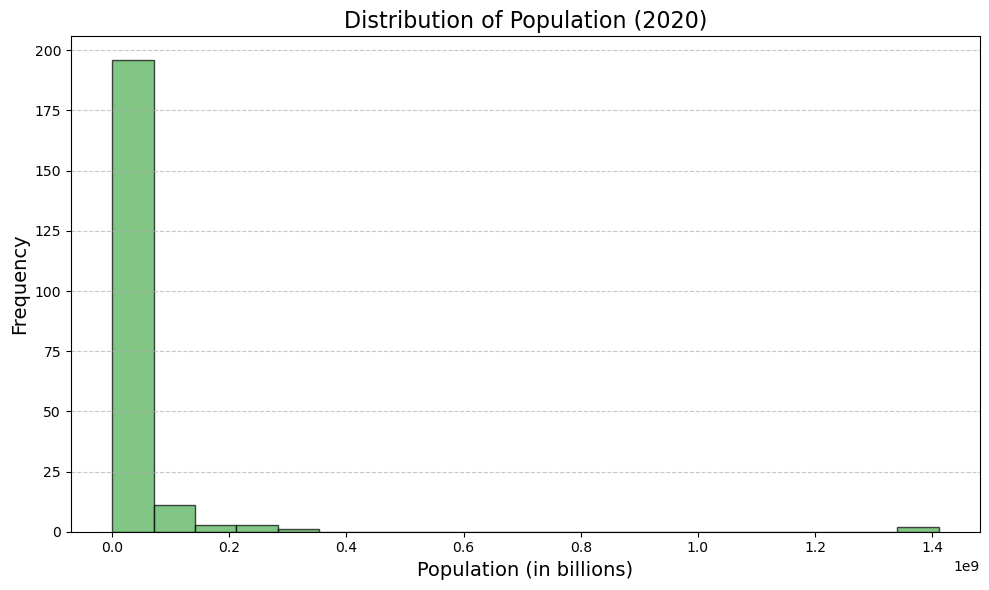

In [28]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data_2020['2020'], bins=20, color='#4CAF50', edgecolor='black', alpha=0.7)

# Add chart details
plt.title('Distribution of Population (2020)', fontsize=16)
plt.xlabel('Population (in billions)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [33]:
# Save the histogram to a file
plt.savefig("E:\\INTERN\\pordigy\\task1\\population_distribution_2020_histogram.png")


<Figure size 640x480 with 0 Axes>